In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    # Ruta al archivo CSV
    ruta_csv = r"/Users/barbarajunqueira/ProjecteData/Equip_16/Data/banca_22.09_dataset.csv"

    # Cargar el CSV en un DataFrame
    df_bank = pd.read_csv(ruta_csv, sep=',', encoding='utf-8')  # usa sep="," si el separador es coma

    print("✅ CSV cargado correctamente.")
    print(df_bank.head())

    # Guardar copia en otra ruta (si querés exportarlo)
    df_bank.to_csv(r"/Users/barbarajunqueira/Desktop/simulacio/dataset_23092025.csv", index=False)
    print("✅ CSV guardado correctamente.")

except Exception as e:
    print(f"❌ Error al trabajar con el CSV: {e}")


✅ CSV cargado correctamente.
   id   age         job  marital  education default  balance housing loan  \
0   1  59.0      admin.  married  secondary      no     2343     yes   no   
1   2  56.0      admin.  married  secondary      no       45      no   no   
2   3  41.0  technician  married  secondary      no     1270     yes   no   
3   4  55.0    services  married  secondary      no     2476     yes   no   
4   5  54.0      admin.  married   tertiary      no      184      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  \
0  unknown    5   may      1042         1     -1         0  unknown     yes   
1  unknown    5   may      1467         1     -1         0  unknown     yes   
2  unknown    5   may      1389         1     -1         0  unknown     yes   
3  unknown    5   may       579         1     -1         0  unknown     yes   
4  unknown    5   may       673         2     -1         0  unknown     yes   

  Clase de edad           Perfil 

In [3]:
df = df_bank.copy()

df['Grupo'] = df.apply(lambda row: 
                       'Sin préstamo ni hipoteca' if row['loan'] == 'no' and row['housing'] == 'no' else
                       'Solo Hipoteca' if row['loan'] == 'no' and row['housing'] == 'yes' else
                       'Solo Préstamo' if row['loan'] == 'yes' and row['housing'] == 'no' else
                       'Préstamo + Hipoteca', axis=1)

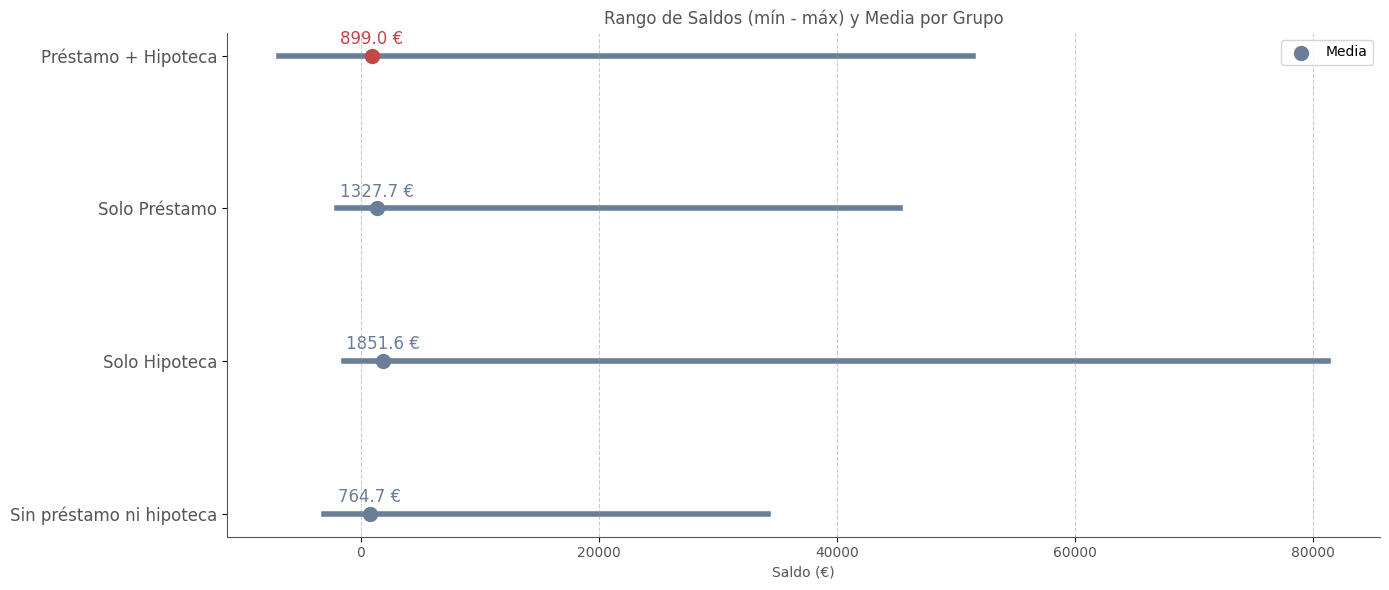

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Estadísticas por grupo
saldos_stats = df.groupby('Grupo')['balance'].agg(['min', 'max', 'mean']).reset_index()

# Orden específico
orden = ['Sin préstamo ni hipoteca', 'Solo Hipoteca', 'Solo Préstamo', 'Préstamo + Hipoteca']
saldos_stats['Grupo'] = pd.Categorical(saldos_stats['Grupo'], categories=orden, ordered=True)
saldos_stats = saldos_stats.sort_values('Grupo')

# Paleta de colores
mycolors = [ "#6a7f97", "#6a7f97","#6a7f97", "#c24747"]

# Crear figura
plt.figure(figsize=(14, 6))

for i, row in saldos_stats.iterrows():
    # Línea del rango (mín-máx)
    plt.plot([row['min'], row['max']], [i, i], color="#6a7f97", linewidth=4, zorder=1)
    
    # Punto de la media
    plt.scatter(row['mean'], i, color=mycolors[i], s=100, label='Media' if i == 0 else "", zorder=2)
    
    # Etiqueta de la media
    plt.text(row['mean'], i + 0.05, f"{row['mean']:.1f} €", ha='center', va='bottom',
             fontsize=12, color=mycolors[i], zorder=3)

# Eje Y: nombres de grupos
plt.yticks(range(len(saldos_stats)), saldos_stats['Grupo'], color='#555555', fontsize=12)

# Eje X
plt.xlabel('Saldo (€)', color='#555555')
plt.xticks(color='#555555')

# Título
plt.title('Rango de Saldos (mín - máx) y Media por Grupo', color='#555555')

# Estilo de cuadrícula
plt.grid(axis='x', linestyle='--', alpha=0.5, color='#999999', zorder=0)

# Espinas (bordes del gráfico)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#555555')
ax.spines['bottom'].set_color('#555555')

# Mostrar leyenda solo una vez
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles=[handles[0]], labels=[labels[0]], loc='upper right')

plt.tight_layout()
plt.show()


/var/folders/y0/7f28l5651dd29dl8fv5rq_nw0000gn/T/ipykernel_71405/1222598684.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=riesgo_stats, x='Riesgo (%)', y='Grupo', palette=mycolors, zorder=2)


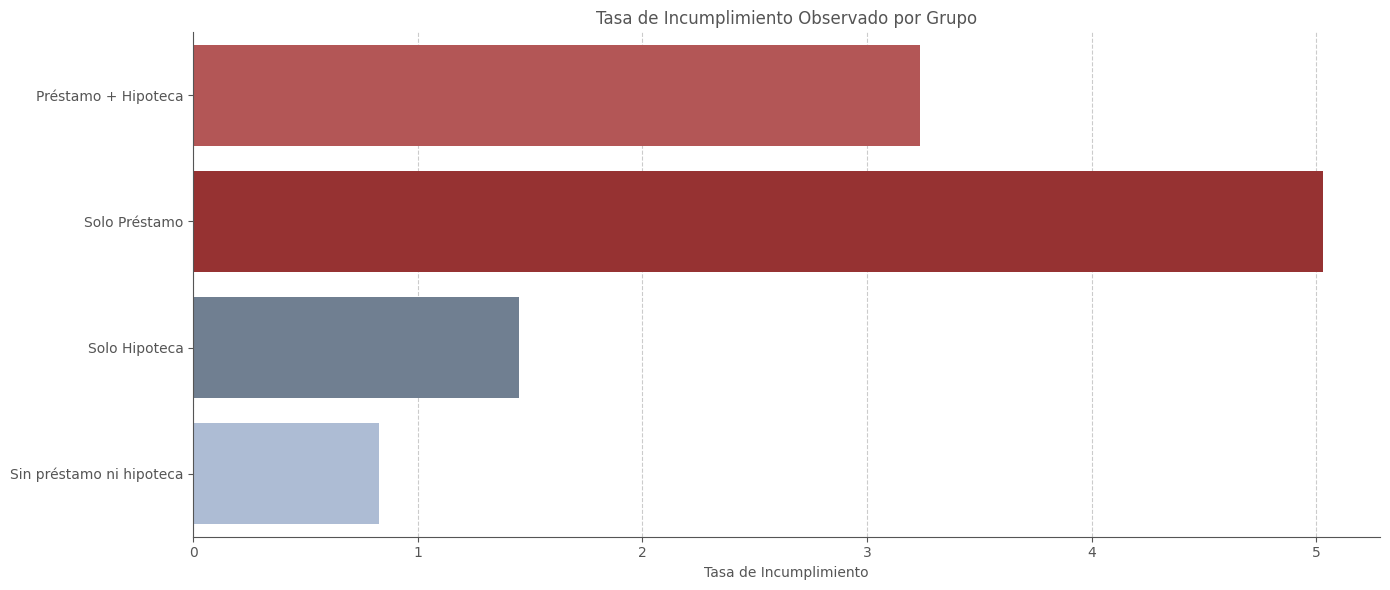

In [5]:
# Definir el orden que quieres
orden = [
    'Préstamo + Hipoteca',
    'Solo Préstamo',
    'Solo Hipoteca',
    'Sin préstamo ni hipoteca'
]

# Convertir 'default' en binaria
df['default_bin'] = df['default'].map({'yes': 1, 'no': 0})

# Riesgo por grupo
riesgo_stats = df.groupby('Grupo')['default_bin'].mean().reset_index()
riesgo_stats['Riesgo (%)'] = riesgo_stats['default_bin'] * 100

# Definir categoría ordenada con ese orden
riesgo_stats['Grupo'] = pd.Categorical(riesgo_stats['Grupo'], categories=orden, ordered=True)

# Ordenar según esa categoría para respetar orden en el gráfico
riesgo_stats = riesgo_stats.sort_values('Grupo')

# Colores (puedes ajustar si quieres)
mycolors = ["#c24747", "#a62222", "#6a7f97", "#a6bbdb"]

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=riesgo_stats, x='Riesgo (%)', y='Grupo', palette=mycolors, zorder=2)

plt.title('Tasa de Incumplimiento Observado por Grupo', color='#555555')
plt.xlabel('Tasa de Incumplimiento', color='#555555')
plt.ylabel('')

ax = plt.gca()
ax.tick_params(axis='x', colors='#555555')
ax.tick_params(axis='y', colors='#555555')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#555555')
ax.spines['bottom'].set_color('#555555')

plt.grid(axis='x', linestyle='--', alpha=0.5, color='#999999', zorder=0)
plt.tight_layout()
plt.show()


In [6]:
# Crear variables binarias necesarias
df['loan_bin'] = (df['loan'] == 'yes').astype(int)
df['housing_bin'] = (df['housing'] == 'yes').astype(int)
df['default_bin'] = (df['default'] == 'yes').astype(int)
df['deposit_bin'] = (df['deposit'] == 'yes').astype(int)
df

,id,age,job,marital,education,default,balance,housing,loan,contact,...,previous,poutcome,deposit,Clase de edad,Perfil,Grupo,default_bin,loan_bin,housing_bin,deposit_bin
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,...,0,unknown,yes,55-64,Gen Z & Boomers,Solo Hipoteca,0,0,1,1
1,2,56.0,admin.,married,secondary,no,45,no,no,unknown,...,0,unknown,yes,55-64,Gen Z & Boomers,Sin préstamo ni hipoteca,0,0,0,1
2,3,41.0,technician,married,secondary,no,1270,yes,no,unknown,...,0,unknown,yes,35-44,Adultxs,Solo Hipoteca,0,0,1,1
3,4,55.0,services,married,secondary,no,2476,yes,no,unknown,...,0,unknown,yes,55-64,Gen Z & Boomers,Solo Hipoteca,0,0,1,1
4,5,54.0,admin.,married,tertiary,no,184,no,no,unknown,...,0,unknown,yes,45-54,Divorciadxs,Sin préstamo ni hipoteca,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16157,21379,47.0,technician,divorced,secondary,no,236,no,no,cellular,...,0,unknown,no,45-54,Divorciadxs,Sin préstamo ni hipoteca,0,0,0,0
16158,21380,33.0,management,married,tertiary,no,6513,yes,no,cellular,...,1,other,yes,25-34,Millenials,Solo Hipoteca,0,0,1,1
16159,21381,42.0,admin.,married,secondary,no,329,no,no,cellular,...,0,unknown,no,35-44,Adultxs,Sin préstamo ni hipoteca,0,0,0,0
16160,21382,31.0,services,married,secondary,no,593,yes,no,cellular,...,0,unknown,no,25-34,Millenials,Solo Hipoteca,0,0,1,0


In [7]:
def clasificar_balance(balance):
    if balance < 0:
        return 'Negativo'
    elif 0 <= balance <= 550:
        return 'Bajo'
    elif 551 <= balance <= 1708:
        return 'Medio'
    else:
        return 'Alto'

# Crear columna BalanceGroup
df['BalanceGroup'] = df['balance'].apply(clasificar_balance)

In [8]:
df['BalanceGroup'].value_counts(normalize=True) * 100

BalanceGroup
Bajo        43.961143
Medio       24.916471
Alto        24.879347
Negativo     6.243039
Name: proportion, dtype: float64

In [9]:
balance_pesos = {
    'Negativo': 0.0,
    'Bajo': 0.33,
    'Medio': 0.66,
    'Alto': 1.0
}

df['Grupo de saldo'] = df['BalanceGroup'].map(balance_pesos)

Score Original

In [10]:
df['score_original'] = (
    0.40 * df['Grupo de saldo'] +
    0.25 * df['default_bin'] +
    0.15 * df['loan_bin'] +
    0.15 * (1 - df['housing_bin']) +
    0.05 * df['deposit_bin']
)


Score Interactivo

In [11]:
def calcular_score_interactivo(row):
    score = 0
    
    if row['loan_bin'] == 1:
        score += 0.20
        if row['housing_bin'] == 0:
            score += 0.05
    
    score += 0.40 * row['Grupo de saldo']
    score += 0.25 * row['default_bin']
    score += 0.10 * (1 - row['deposit_bin'])
    
    return score


df['score_interactivo'] = df.apply(calcular_score_interactivo, axis=1)

Grupos combinados de préstamo/hipoteca

In [12]:
# Crear la columna 'Grupo' con etiquetas según combinaciones binarias
df['Grupo'] = df.apply(lambda row: 
    'Solo Préstamo' if row['loan_bin'] == 1 and row['housing_bin'] == 0 else
    'Préstamo + Hipoteca' if row['loan_bin'] == 1 and row['housing_bin'] == 1 else
    'Solo Hipoteca' if row['loan_bin'] == 0 and row['housing_bin'] == 1 else
    'Sin préstamo ni hipoteca', axis=1
)

Comparativa

In [13]:
# Calcular riesgo observado y scores medios por grupo
tabla = df.groupby('Grupo')[['score_original', 'score_interactivo']].mean().reset_index()
tabla['riesgo_observado'] = df.groupby('Grupo')['default_bin'].mean().values * 100

# Reordenar columnas para claridad
tabla = tabla[['Grupo', 'riesgo_observado', 'score_original', 'score_interactivo']]
tabla

,Grupo,riesgo_observado,score_original,score_interactivo
0,Préstamo + Hipoteca,3.236515,0.349990,0.451318
1,Sin préstamo ni hipoteca,0.825255,0.425567,0.286106
2,Solo Hipoteca,1.451084,0.236596,0.279793
3,Solo Préstamo,5.032823,0.511681,0.508179


Gráfico de barras y líneas: Score vs Riesgo Observado

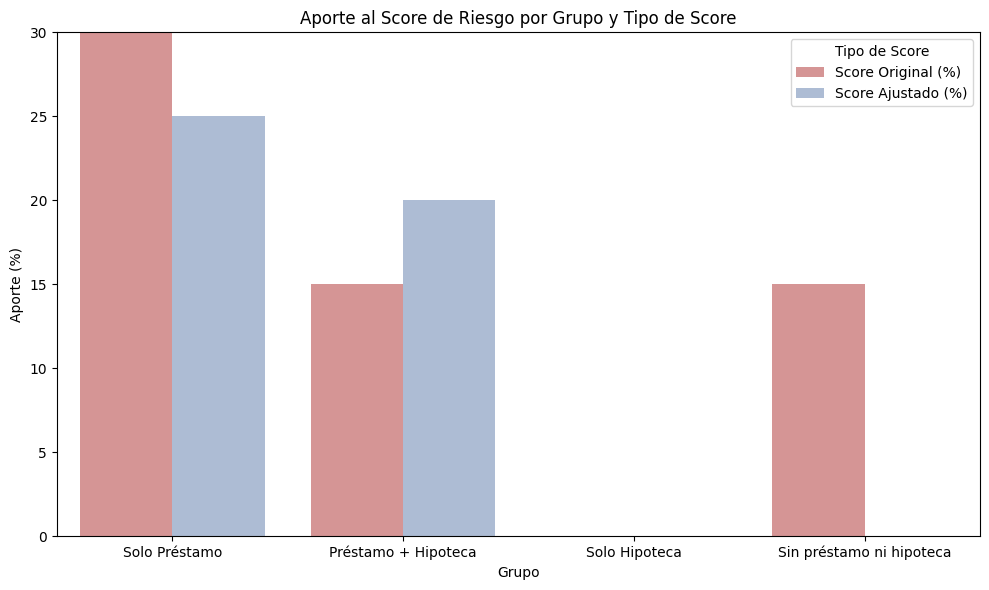

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los datos según la tabla que discutimos
data = {
    'Grupo': ['Solo Préstamo', 'Préstamo + Hipoteca', 'Solo Hipoteca', 'Sin préstamo ni hipoteca'],
    'Score Original (%)': [30, 15, 0, 15],
    'Score Ajustado (%)': [25, 20, 0, 0]
}

tabla_scores = pd.DataFrame(data)

# Para hacer el gráfico con barras agrupadas (lado a lado), necesitamos "derretir" el DataFrame
tabla_melt = tabla_scores.melt(id_vars='Grupo', var_name='Tipo de Score', value_name='Aporte (%)')

# Ordenar grupos para que salga en el orden correcto
orden = ['Solo Préstamo', 'Préstamo + Hipoteca', 'Solo Hipoteca', 'Sin préstamo ni hipoteca']
tabla_melt['Grupo'] = pd.Categorical(tabla_melt['Grupo'], categories=orden, ordered=True)
tabla_melt = tabla_melt.sort_values('Grupo')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=tabla_melt, x='Grupo', y='Aporte (%)', hue='Tipo de Score', palette=['#e08a8a', '#a6bbdb']
)

plt.title('Aporte al Score de Riesgo por Grupo y Tipo de Score')
plt.ylabel('Aporte (%)')
plt.xlabel('Grupo')
plt.ylim(0, 30)
plt.legend(title='Tipo de Score')
plt.tight_layout()
plt.show()


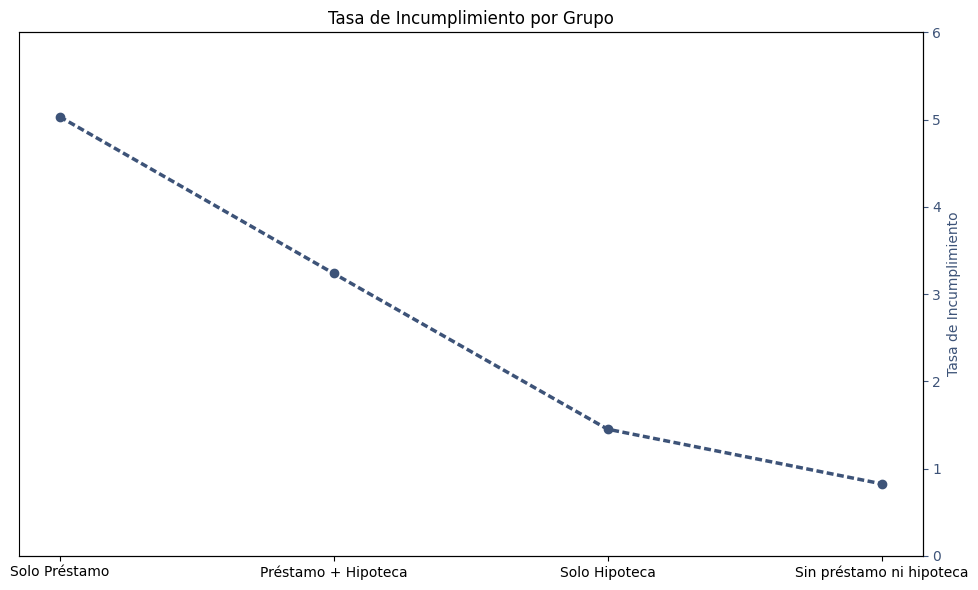

In [15]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Datos tasa de incumplimiento
tasa_incumplimiento = df.groupby('Grupo')['default_bin'].mean().reset_index()
tasa_incumplimiento['Tasa de Incumplimiento (%)'] = tasa_incumplimiento['default_bin'] * 100

# Ordenar grupos
orden = ['Solo Préstamo', 'Préstamo + Hipoteca', 'Solo Hipoteca', 'Sin préstamo ni hipoteca']
tasa_incumplimiento['Grupo'] = pd.Categorical(tasa_incumplimiento['Grupo'], categories=orden, ordered=True)
tasa_incumplimiento = tasa_incumplimiento.sort_values('Grupo')

# Eje x común
x = tasa_incumplimiento['Grupo']

# Crear eje derecho para la tasa
ax2 = ax1.twinx()

# Plot línea en eje derecho
ax2.plot(x, tasa_incumplimiento['Tasa de Incumplimiento (%)'], marker='o', linestyle=(0, (2, 1)), color='#3d5378', lw=2.5)
ax2.set_ylabel('Tasa de Incumplimiento', color='#3d5378')
ax2.set_ylim(0, 6)
ax2.tick_params(axis='y', colors='#3d5378')

# Ocultar solo las etiquetas y ticks del eje izquierdo (y)
ax1.get_yaxis().set_visible(False)
ax1.spines['left'].set_visible(False)

# Mantener las etiquetas del eje x visibles
ax1.set_xlabel('')
ax1.set_xticks(range(len(orden)))
ax1.set_xticklabels(orden)

plt.title('Tasa de Incumplimiento por Grupo')
plt.tight_layout()
plt.show()
